# CPSC 422 - Assignment 3

## Question 1: Inference in Markov Networks (Undirected Graphical Models)
![img](img/A3Q1.png)

### 1b: Compute $P(A|B=b_1)$ using Gibbs Sampling and show how estimate changes as number of samples increases

Necessary Imports:

In [7]:
from random import randint, choices
import matplotlib.pyplot as plt

Define Factors:

In [8]:
# Define Factors

factorAB = {
    (0,0): 30,
    (0,1): 5,
    (1,0): 1,
    (1,1): 10
}

factorBC = {
    (0,0): 100,
    (0,1): 1,
    (1,0): 1,
    (1,1): 100
}

factorCD = {
    (0,0): 1,
    (0,1): 100,
    (1,0): 100,
    (1,1): 1
}

factorDA = {
    (0,0): 100,
    (0,1): 1,
    (1,0): 1,
    (1,1): 100
}

Define Key Constants/Variables:

In [9]:
# Define Key Constants/Variables

numSamples = 3*1000000

sampleOrder = {
    'A': 'C',
    'C': 'D',
    'D': 'A'
}

Pa1Givenb1 = [None]
a1Count = 0
a0Count = 0

# Random Initial State
state = {
    'A': randint(0,1),
    'B': 1, # This should remain fixed
    'C': randint(0,1),
    'D': randint(0,1)
}

variableToSample = 'C'

Gibbs Sampling:

In [10]:
# Gibbs Sampling

for _ in range(numSamples): 
    
    # Find the product of factors
    if variableToSample == 'A':
        p1 = factorAB[(1, state['B'])] * factorDA[(state['D'], 1)]
        p0 = factorAB[(0, state['B'])] * factorDA[(state['D'], 0)]
    elif variableToSample == 'C':
        p1 = factorBC[(state['B'], 1)] * factorCD[(1, state['D'])]
        p0 = factorBC[(state['B'], 0)] * factorCD[(0, state['D'])]
    elif variableToSample == 'D':
        p1 = factorCD[(state['C'], 1)] * factorDA[(1, state['A'])]
        p0 = factorCD[(state['C'], 0)] * factorDA[(0, state['A'])]
    
    # Normalize and sample
    p1Normalized = p1 / (p1+p0)
    p0Normalized = 1 - p1Normalized
    state[variableToSample] = choices([1,0], [p1Normalized, p0Normalized])[0]
    
    # Update the counts after a full sample
    if variableToSample == 'A':
        if state['A'] == 1:
            a1Count += 1
        elif state['A'] == 0:
            a0Count += 1
        Pa1Givenb1.append(a1Count/(a1Count+a0Count))
    
    # Move to next sample
    variableToSample = sampleOrder[variableToSample]

**Therefore, $P(A|B=b_1)$ approximated by Gibbs Sampling:**

In [11]:
# Find P(A|B=b1) after the last sample

print(f"P(A=a1|B=b1) = {Pa1Givenb1[-1]}")
print(f"P(A=a0|B=b1) = {1-Pa1Givenb1[-1]}")

P(A=a1|B=b1) = 0.05636
P(A=a0|B=b1) = 0.94364


**Graph approximation from Gibbs Sampling vs. true probability:**

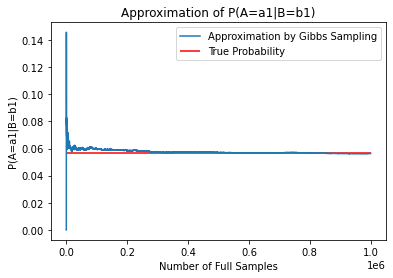

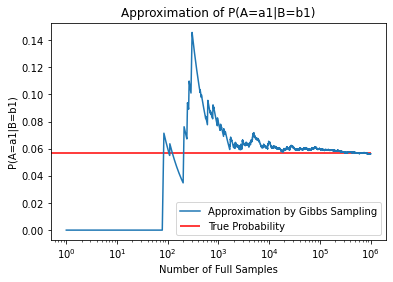

In [12]:
def plotGibbsApproximation(Pa1Givenb1, scale='linear'):
    plt.plot(range(len(Pa1Givenb1)), Pa1Givenb1, label="Approximation by Gibbs Sampling");
    if scale=='log':
        plt.xscale('log',base=10)
    plt.title("Approximation of P(A=a1|B=b1)");
    plt.xlabel("Number of Full Samples");
    plt.ylabel("P(A=a1|B=b1)");
    trueProbability = 0.05658953769
    plt.hlines(trueProbability, xmin=0, xmax=len(Pa1Givenb1), label="True Probability", color='red')
    plt.legend();
    plt.show();

plotGibbsApproximation(Pa1Givenb1)
plotGibbsApproximation(Pa1Givenb1, scale='log')